In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [328]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')
IdTest = df_test['PassengerId']

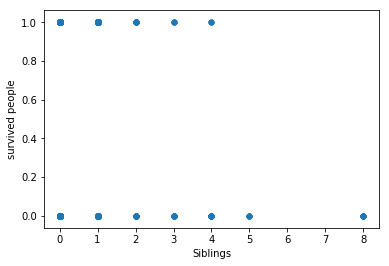

In [329]:
plt.scatter(df_train['SibSp'], df_train['Survived'], s = 25)
plt.xlabel('Siblings')
plt.ylabel('survived people')
plt.show()

In [330]:
df_train = df_train.drop(df_train[df_train['SibSp'] == 8].index, axis = 0)
df_train = df_train.drop([28, 89, 342], axis = 0)

In [331]:
length_of_train = len(df_train)
dataset = pd.concat(objs = [df_train, df_test], axis = 0)

In [332]:
print(dataset.isnull().sum())

Age             255
Cabin          1004
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


In [333]:
print(df_train.info())
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            712 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          204 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 89.5+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            169
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          677
Embarked         2
dtype: int64


In [334]:
dataset.fillna(np.nan)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


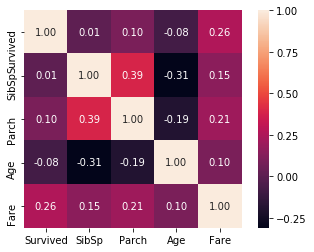

In [335]:
heatmap = sns.heatmap(df_train[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot = True, square = True, fmt = '.2f')

In [336]:
#Fill Fare missing values with the median value
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [337]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [338]:
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

In [339]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(dataset['Age'][dataset['Age'].isnull()].index)
for i in index_NaN_age :
    age_pred = dataset['Age'][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    dataset.at[i, 'Age'] = age_pred

In [340]:
dataset['Age'].isnull().sum()

0

In [341]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [342]:
# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [343]:
# Create a family size descriptor from SibSp and Parch
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

In [344]:
# Create new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

In [345]:
# convert to indicator values Title and Embarked 
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [346]:
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin']])
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

In [347]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [348]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [349]:
# Create categorical values for Pclass
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

In [350]:
# Drop useless variables 
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [351]:
dataset.isnull().sum()

Age                     0
Fare                    0
Parch                   0
Sex                     0
SibSp                   0
Survived              418
Fsize                   0
Single                  0
SmallF                  0
MedF                    0
LargeF                  0
Title_Capt              0
Title_Col               0
Title_Don               0
Title_Dr                0
Title_Jonkheer          0
Title_Lady              0
Title_Major             0
Title_Master            0
Title_Miss              0
Title_Mlle              0
Title_Mme               0
Title_Mr                0
Title_Mrs               0
Title_Ms                0
Title_Rev               0
Title_Sir               0
Title_the Countess      0
Em_C                    0
Em_Q                    0
                     ... 
T_FCC                   0
T_Fa                    0
T_LINE                  0
T_LP                    0
T_PC                    0
T_PP                    0
T_PPP                   0
T_SC        

In [352]:
## Separate train dataset and test dataset

df_train = dataset[:length_of_train]
df_test = dataset[length_of_train:]
df_test.drop(labels=["Survived"], axis = 1, inplace=True)

c:\users\hamed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [353]:
## Separate train features and label 

df_train["Survived"] = df_train["Survived"].astype(int)

Y_train = df_train["Survived"]

X_train = df_train.drop(labels = ["Survived"], axis = 1)

c:\users\hamed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [354]:
classifier = LogisticRegression(random_state = 2)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

0.8172531214528944


In [355]:
prediction = classifier.predict(df_test)

In [356]:
evaluation_result = np.concatenate([np.array(IdTest).reshape(-1, 1), prediction.reshape(-1, 1)], axis = 1)
evaluation_result = pd.DataFrame(evaluation_result, index = None, columns = ['PassengerId', 'Survived'])
evaluation_result = evaluation_result.astype({'PassengerId': int})
evaluation_result = evaluation_result.set_index('PassengerId')
evaluation_result.to_csv('./Data/final_result.csv')